In [1]:
from BorutaShap import BorutaShap, load_data
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X, y = load_data(data_type='classification')
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
model = RandomForestClassifier(class_weight = 'balanced')

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:51<00:00,  1.94it/s]

19 attributes confirmed important: ['worst concavity', 'concave points error', 'mean radius', 'area error', 'radius error', 'worst radius', 'worst concave points', 'worst perimeter', 'worst texture', 'worst area', 'worst compactness', 'mean concavity', 'perimeter error', 'mean texture', 'mean concave points', 'mean area', 'mean compactness', 'concavity error', 'mean perimeter']
8 attributes confirmed unimportant: ['symmetry error', 'worst symmetry', 'texture error', 'smoothness error', 'fractal dimension error', 'mean symmetry', 'mean smoothness', 'mean fractal dimension']
3 tentative attributes remains: ['worst smoothness', 'compactness error', 'worst fractal dimension']


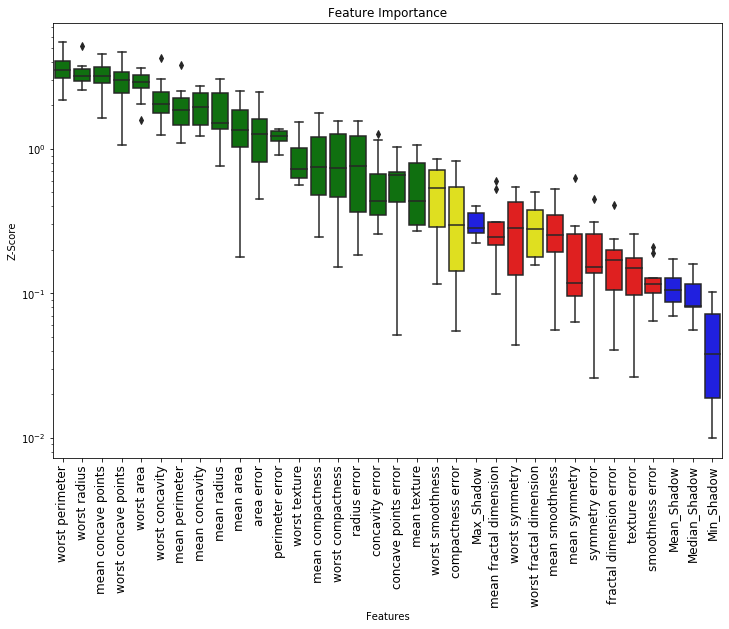

In [3]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [4]:
# The scale pos weight factor should be equal to the scale_pos_weight = count(negative examples)/count(Positive examples)
# in this case as the classes are already equal we get one
model = XGBClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.84it/s]


11 attributes confirmed important: ['worst concavity', 'worst radius', 'area error', 'worst concave points', 'worst perimeter', 'worst smoothness', 'mean texture', 'compactness error', 'worst texture', 'mean concave points', 'worst area']
19 attributes confirmed unimportant: ['concave points error', 'worst symmetry', 'texture error', 'mean radius', 'radius error', 'mean smoothness', 'mean fractal dimension', 'worst compactness', 'symmetry error', 'mean concavity', 'perimeter error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'mean area', 'mean compactness', 'concavity error', 'smoothness error', 'mean perimeter']
0 tentative attributes remains: []


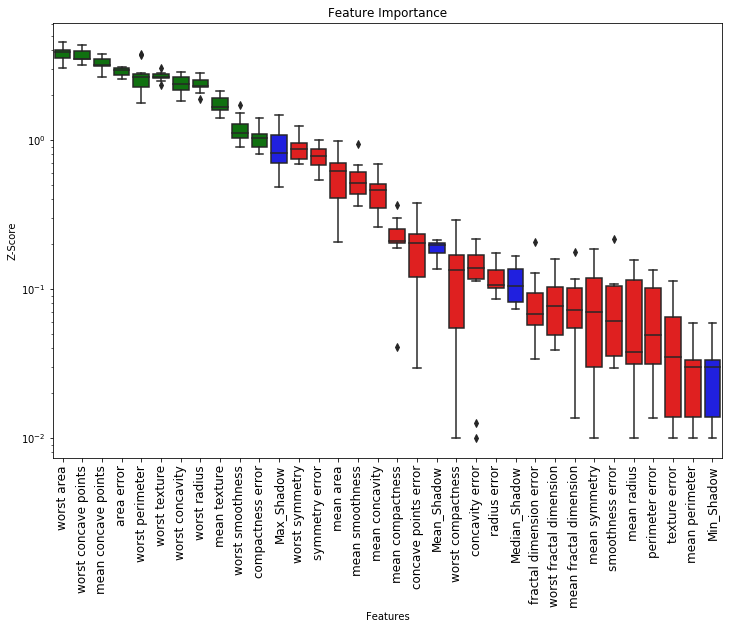

In [5]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')